In [1]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator
HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
x = QubitOperator('X0 Y1 Z2 Y3', 0.25j)
theta = np.pi
full_exp_circ_obj = full_exponentiated_PauliWord_circuit(x, theta)
UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
YY = QubitOperator('X0 X1 Y3', 0.25j)
pauliword_change_and_measure_obj = change_pauliword_to_Z_basis_then_measure(YY)
P_measure = cirq.Circuit(cirq.decompose_once((pauliword_change_and_measure_obj(*cirq.LineQubit.range(pauliword_change_and_measure_obj.num_qubits())))))

full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations(), *P_measure.all_operations()])
print(full_circuit)

0: ───X──────────H──────────@───────────────────────────────────────X───────────H───────────H───M───
                            │                                       │                           │
1: ───X──────────Rx(0.5π)───X───@───────────────────────X───────────@───────────Rx(-0.5π)───H───M───
                                │                       │                                       │
2: ─────────────────────────────X───@───────────────X───@───────────────────────────────────────┼───
                                    │               │                                           │
3: ───Rx(0.5π)──────────────────────X───Rz(-0.5π)───@───Rx(-0.5π)───Rx(-0.5π)───────────────────M───


## Get_Histogram_key

In [2]:
YY = QubitOperator('X0 X1 Y3', 0.25j)
Get_Histogram_key(YY)

'0,1,3'

## Simulate_Quantum_Circuit

In [3]:
num_shots = 1000
YY = QubitOperator('X0 X1 Y3', 0.25j)

histogram_string= Get_Histogram_key(YY)
Simulate_Quantum_Circuit(full_circuit, num_shots, histogram_string)

Counter({7: 140, 1: 153, 5: 113, 2: 135, 4: 114, 0: 102, 3: 122, 6: 121})

## Get_wavefunction

In [4]:
def Get_wavefunction(quantum_circuit, sig_figs=3):
    """
     Function to simulate quantum circuit and wavefunction

    """
    quantum_circuit_M_gates_removed = quantum_circuit.moments[
                                      :-1]  # removes last moment (aka measurement step - which collapses wavefunction)
    quantum_circuit_new = cirq.Circuit(quantum_circuit_M_gates_removed)
    simulator = cirq.Simulator()
    result = simulator.simulate(quantum_circuit_new, qubit_order=quantum_circuit_new.all_qubits())
    print(np.around(result.final_state, sig_figs))
    return result.final_state

In [5]:
YY = QubitOperator('X0 X1 Y3', 0.25j)

histogram_string= Get_Histogram_key(YY)
Get_wavefunction(full_circuit, sig_figs=3)

[-0.25+0.j    0.  +0.25j  0.  -0.25j  0.25+0.j   -0.25+0.j    0.  +0.25j
  0.  -0.25j  0.25+0.j    0.  +0.25j  0.25+0.j   -0.25+0.j    0.  -0.25j
  0.  -0.25j -0.25+0.j    0.25+0.j    0.  +0.25j]


array([-0.24999997+0.j        ,  0.        +0.24999997j,
        0.        -0.24999997j,  0.24999997+0.j        ,
       -0.24999997+0.j        ,  0.        +0.24999997j,
        0.        -0.24999997j,  0.24999997+0.j        ,
        0.        +0.24999997j,  0.24999997+0.j        ,
       -0.24999997+0.j        ,  0.        -0.24999997j,
        0.        -0.24999997j, -0.24999997+0.j        ,
        0.24999997+0.j        ,  0.        +0.24999997j], dtype=complex64)

## Return_as_binary

In [6]:
num_shots = 1000
YY = QubitOperator('X0 X1 Y3', 0.25j)

histogram_string= Get_Histogram_key(YY)
c_result = Simulate_Quantum_Circuit(full_circuit, num_shots, histogram_string)
Return_as_binary(c_result, histogram_string)

{'110': 124,
 '010': 132,
 '000': 124,
 '101': 116,
 '100': 126,
 '001': 127,
 '111': 134,
 '011': 117}

## expectation_value_by_parity

In [7]:
num_shots = 10000
YY = QubitOperator('X0 X1 Y3', 0.25j)

histogram_string= Get_Histogram_key(YY)
c_result = Simulate_Quantum_Circuit(full_circuit, num_shots, histogram_string)
b_result = Return_as_binary(c_result, histogram_string)

expectation_value_by_parity(b_result)

0.0068

In [28]:
## wrong method!

# def expectation_value_by_parity(binary_counter_result):
#     """

#     < Z >  = (num_0 - num_1) / total_num_measurements = (num_0 - num_1) / (num_0 + num_1)

#     note that for multiple qubits one multiplies <Z> on each line. Therefore can calculate value from parity
#     of output bit string

#     :param binary_counter_result:
#     :type binary_counter_result: dict
#     e.g.
#         {
#             1: {'11': 10000},
#             2: {'10': 9998, '01': 2},
#             3: {'10': 10000},
#             4: {'10': 10000},
#             5: {'10': 10000},
#             6: {'00': 9995, '01': 4, '10': 1},
#             7: {'1': 9334, '0': 666},
#             8: {'1': 9351, '0': 649},
#             9: {'0': 9606, '1': 394},
#             10: {'0': 9594, '1': 406}
#         }

#     :return: expectation value <Z>
#     :rtype: float
#     """
#     n_0 =0
#     n_1 =0
#     for state in binary_counter_result:
#         for bit in state:
#             if int(bit) == 0:
#                 n_0 += binary_counter_result[state]
#             elif int(bit) == 1:
#                 n_1 += binary_counter_result[state]
#             else:
#                 raise ValueError('{} is not a bit'.format(bit))
            
#     expectation_value = (n_0-n_1) / (n_0+n_1)
#     return expectation_value

In [35]:
class VQE_Experiment():
    def __init__(self, qubitHamiltonian, ansatz_circuit, n_shots):
        self.qubitHamiltonian = qubitHamiltonian
        self.ansatz_circuit = ansatz_circuit
        self.n_shots = n_shots

    def Calc_Energy(self):

        E_list=[]
        for qubitOp in self.qubitHamiltonian:
            for PauliWord, const in qubitOp.terms.items():
                if PauliWord is not ():
                    Q_circuit = Generate_Full_Q_Circuit(self.ansatz_circuit, qubitOp)
                    hist_key_str = Get_Histogram_key(qubitOp)
                    int_state_counter = Simulate_Quantum_Circuit(Q_circuit, self.n_shots, hist_key_str)
                    binary_state_counter = Return_as_binary(int_state_counter, hist_key_str)
                    exp_result = expectation_value_by_parity(binary_state_counter)
                    E_list.append(exp_result*const)
                else:
                    E_list.append(const)
        return sum(E_list).real

    def Get_wavefunction_of_state(self, sig_figs=3):
        return Get_wavefunction(self.ansatz_circuit, sig_figs=sig_figs)

In [11]:
from quchem.Hamiltonian_Generator_Functions import *
### Parameters
Molecule = 'H2'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-3g'

### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!

Hamilt.Get_Molecular_Hamiltonian(Get_H_matrix=False)
QubitHam = Hamilt.Get_Qubit_Hamiltonian(transformation='JW')

ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)

Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops, theta_parameters_ia, theta_parameters_ijab = ansatz_obj.Get_ia_and_ijab_terms()

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops,
                                                                                                                    transformation='JW')

full_ansatz_Q_Circ = Ansatz_Circuit(Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab,
             Hamilt.molecule.n_qubits, Hamilt.molecule.n_electrons)

ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(theta_parameters_ia, theta_parameters_ijab)

In [12]:
n_shots= 1000

VQE_exp = VQE_Experiment(QubitHam, ansatz_cirq_circuit, n_shots)
VQE_exp.Calc_Energy()

-0.11006665036999236

In [36]:
n_shots=1000

def GIVE_ENERGY(theta_ia_theta_jab_list):
    theta_ia = theta_ia_theta_jab_list[:len(theta_parameters_ia)]
    theta_ijab = theta_ia_theta_jab_list[len(theta_parameters_ia):]
    
    ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(theta_parameters_ia, theta_parameters_ijab)

    VQE_exp = VQE_Experiment(QubitHam, ansatz_cirq_circuit, n_shots)
    

    return VQE_exp.Calc_Energy()

from quchem.Scipy_Optimizer import *
# THETA_params = [*theta_parameters_ia, *theta_parameters_ijab]
THETA_params=[3,2,3]
GG = Optimizer(GIVE_ENERGY, THETA_params, 'Nelder-Mead', store_values=True, display_iter_steps=True,
               tol=1e-5,
               display_convergence_message=True)
GG.get_env(50)
GG.plot_convergence()
plt.show()

0: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.09521239785672486
1: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.07867714591222703
2: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.0869946974923097
3: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.1164892398390727
4: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.08523888263702713
5: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.10880188283337273
6: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.11000990130122026
7: Input_to_Funct: [3.025      2.01666667 3.075     ]: Output: -0.10424327005533776
8: Input_to_Funct: [3.02604167 2.02569444 3.059375  ]: Output: -0.10963569758571909
9: Input_to_Funct: [3.02604167 2.02569444 3.059375  ]: Output: -0.11138419876887126


KeyboardInterrupt: 

In [14]:
Qubit_Op_list_Second_Quant_CC_Ops_ia

[-0.5j [X0 Z1 Y2] +
 0.5j [Y0 Z1 X2],
 -0.5j [X1 Z2 Y3] +
 0.5j [Y1 Z2 X3]]

In [15]:
# from quchem.quantum_circuit_functions import Generate_Full_Q_Circuit


# class VQE_Experiment():
#     def __init__(self, qubitHamiltonian, ansatz_circuit, n_shots):
#         self.qubitHamiltonian = qubitHamiltonian
#         self.ansatz_circuit = ansatz_circuit
#         self.n_shots = n_shots

#     def Calc_Energy(self):
#         t_results=[]
#         E_list=[]
#         for qubitOp in self.qubitHamiltonian:
#             for PauliWord, const in qubitOp.terms.items():
#                 if PauliWord is not ():
                    
#                     Q_circuit = Generate_Full_Q_Circuit(self.ansatz_circuit, qubitOp)
#                     hist_key_str = Get_Histogram_key(qubitOp)
#                     int_state_counter = Simulate_Quantum_Circuit(Q_circuit, self.n_shots, hist_key_str)
#                     binary_state_counter = Return_as_binary(int_state_counter, hist_key_str)
#                     exp_result = expectation_value_by_parity(binary_state_counter)
#                     E_list.append(exp_result*const)
                    
#                     t_results.append((exp_result, const))
#                 else:
#                     E_list.append(const)
#                     t_results.append((1, const))
                    
                    
#         return sum(E_list).real, t_results

#     def Get_wavefunction_of_state(self, sig_figs=3):
#         return Get_wavefunction(self.ansatz_circuit, sig_figs=sig_figs)


In [16]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', 0.25j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
H2_ansatz(np.pi)               

0: ───X───Rx(0.5π)───@───────────────────────────────X───Rx(-0.5π)───
                     │                               │
1: ───X───H──────────X───@───────────────────────X───@───H───────────
                         │                       │
2: ───H──────────────────X───@───────────────X───@───H───────────────
                             │               │
3: ───H──────────────────────X───Rz(-0.5π)───@───H───────────────────

0: Input_to_Funct: [2.15]: Output: -0.0986436631766118
1: Input_to_Funct: [2.15]: Output: -0.12175254906730307
2: Input_to_Funct: [2.15]: Output: -0.1160101736302532
3: Input_to_Funct: [2.15]: Output: -0.09293229602263614
4: Input_to_Funct: [2.15]: Output: -0.0789768105078713
5: Input_to_Funct: [2.15]: Output: -0.08734183320031416
6: Input_to_Funct: [2.15]: Output: -0.1097757665175724
7: Input_to_Funct: [2.15]: Output: -0.08507364271659842
8: Input_to_Funct: [2.15]: Output: -0.09318681735206893
9: Input_to_Funct: [2.15]: Output: -0.09987859860828453
10: Input_to_Funct: [2.15]: Output: -0.11370448443981102
11: Input_to_Funct: [2.15]: Output: -0.0932696300281047
12: Input_to_Funct: [2.14998779]: Output: -0.1231236989933294
13: Input_to_Funct: [2.14998779]: Output: -0.06748287644760673
14: Input_to_Funct: [2.14998779]: Output: -0.0895866900296069
15: Input_to_Funct: [2.14998779]: Output: -0.10000979457424397
16: Input_to_Funct: [2.14998779]: Output: -0.08764809418848404
17: Input_to_Funct

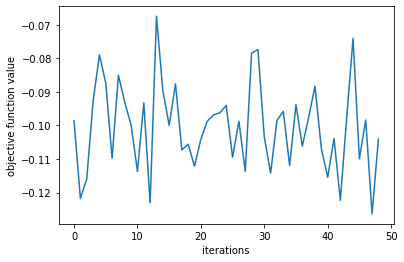

In [37]:
n_shots=1000

def GIVE_ENERGY(THETA):
   
    ansatz_cirq_circuit = H2_ansatz(THETA)

    VQE_exp = VQE_Experiment(QubitHam, ansatz_cirq_circuit, n_shots)

    return VQE_exp.Calc_Energy()

from quchem.Scipy_Optimizer import *
THETA_params=[2]
GG = Optimizer(GIVE_ENERGY, THETA_params, 'Nelder-Mead', store_values=True, display_iter_steps=True,
               tol=1e-5,
               display_convergence_message=True)
GG.get_env(50)
GG.plot_convergence()
plt.show()

In [38]:
def expectation_value_by_parityWRONG(binary_counter_result):
    """

    < Z >  = (num_0 - num_1) / total_num_measurements = (num_0 - num_1) / (num_0 + num_1)

    note that for multiple qubits one multiplies <Z> on each line. Therefore can calculate value from parity
    of output bit string

    :param binary_counter_result:
    :type binary_counter_result: dict
    e.g.
        {
            1: {'11': 10000},
            2: {'10': 9998, '01': 2},
            3: {'10': 10000},
            4: {'10': 10000},
            5: {'10': 10000},
            6: {'00': 9995, '01': 4, '10': 1},
            7: {'1': 9334, '0': 666},
            8: {'1': 9351, '0': 649},
            9: {'0': 9606, '1': 394},
            10: {'0': 9594, '1': 406}
        }

    :return: expectation value <Z>
    :rtype: float
    """
    n_0 =0
    n_1 =0
    for state in binary_counter_result:
        for bit in state:
            if int(bit) == 0:
                n_0 += binary_counter_result[state]
            elif int(bit) == 1:
                n_1 += binary_counter_result[state]
            else:
                raise ValueError('{} is not a bit'.format(bit))
            
    expectation_value = (n_0-n_1) / (n_0+n_1)
    return expectation_value

In [39]:
class VQE_Experiment():
    def __init__(self, qubitHamiltonian, ansatz_circuit, n_shots):
        self.qubitHamiltonian = qubitHamiltonian
        self.ansatz_circuit = ansatz_circuit
        self.n_shots = n_shots

    def Calc_Energy(self):

        E_list=[]
        for qubitOp in self.qubitHamiltonian:
            for PauliWord, const in qubitOp.terms.items():
                if PauliWord is not ():
                    Q_circuit = Generate_Full_Q_Circuit(self.ansatz_circuit, qubitOp)
                    
                    print(Q_circuit)
                    print(qubitOp)
                    print('')
                    
                    hist_key_str = Get_Histogram_key(qubitOp)
                    int_state_counter = Simulate_Quantum_Circuit(Q_circuit, self.n_shots, hist_key_str)
                    binary_state_counter = Return_as_binary(int_state_counter, hist_key_str)
                    exp_result = expectation_value_by_parityWRONG(binary_state_counter)
                    print(exp_result)
                    E_list.append(exp_result*const)
                    
                    print(binary_state_counter)
                    
                    print('')
                    print('')
                    print('###')
                else:
                    E_list.append(const)
        print(E_list)
        return sum(E_list).real

    def Get_wavefunction_of_state(self, sig_figs=3):
        return Get_wavefunction(self.ansatz_circuit, sig_figs=sig_figs)


In [40]:
ansatz = H2_ansatz(2*np.pi) 
xx = VQE_Experiment(QubitHam, ansatz, 10000)
xx.Calc_Energy()

0: ───X───Rx(0.5π)───@────────────────────────────X───Rx(-0.5π)───M───
                     │                            │
1: ───X───H──────────X───@────────────────────X───@───H───────────────
                         │                    │
2: ───H──────────────────X───@────────────X───@───H───────────────────
                             │            │
3: ───H──────────────────────X───Rz(-π)───@───H───────────────────────
(0.17141282639402405+0j) [Z0]

0.0088
{'1': 4956, '0': 5044}


###
0: ───X───Rx(0.5π)───@────────────────────────────X───Rx(-0.5π)───────
                     │                            │
1: ───X───H──────────X───@────────────────────X───@───H───────────M───
                         │                    │
2: ───H──────────────────X───@────────────X───@───H───────────────────
                             │            │
3: ───H──────────────────────X───Rz(-π)───@───H───────────────────────
(0.171412826394024+0j) [Z1]

-0.0104
{'1': 5052, '0': 4948}


###
0: ───X───R

-1.0
{'11': 10000}


###
[(-0.09706626861762624+0j), (0.0015084328722674118+0j), (-0.0017826933944978494+0j), (0.2234315367466397-0j), (0.2234315367466397-0j), (0.0011133472791337571+0j), (-0.0001698848081575848+0j), (-0.00020612690056453624+0j), (8.83401002419441e-05-0j), (2.7181569305213567e-05+0j), (-0.06087955601053414+0j), (-0.08239977047015731+0j), (-0.08251591996538307+0j), (-0.059226990293584816+0j), (-0.174412876106516+0j)]


-0.1090597112527938

In [20]:
#TODO
# write maths of PauliMeasurement!
# something is off!!!

$$ U_{UCCSD}|HF\rangle = |\psi_{UCCSD}\rangle$$ 

$$ E =  \langle \psi_{UCCSD}| H |\psi_{UCCSD}\rangle$$ 

$$H = \sum_{i} \alpha_{i} P_{i}$$ 

$$ E_{i} =  \langle \psi_{UCCSD}| P_{i} |\psi_{UCCSD}\rangle$$ 

$$ E_{i} =  \langle \psi_{UCCSD}| P_{i} |\psi_{UCCSD}\rangle = M_{z} U_{i}|\psi_{UCCSD}\rangle$$ 

- where : $ U_{i}$ is a change of basis of $P_{i}$ to Z basis

AKA requires the following **single** qubit transforms:

$$X|\pm\rangle = ZH|\pm\rangle = Z|0/1\rangle$$ 

$$Y|i\pm \rangle = ZR_{x}\big(-\frac{\pi}{2} \big)|i\pm\rangle = Z|0/1\rangle$$ 

- note $Z$ here is a measurement in Z basis!

overall we are doing

$$ E_{i} =  P_{i} |\psi_{UCCSD}\rangle = M_{z} U_{i}|\psi_{UCCSD}\rangle = M_{z}|\psi_{P_{i}}\rangle = \langle\psi_{P_{i}}|M_{z}^{\dagger} M_{z}|\psi_{P_{i}}\rangle $$ 

$$P|\psi_{UCCSD}\rangle$$ 

$$X|\pm\rangle = ZH|\pm\rangle = Z|0/1\rangle$$ 

$$Y|i\pm \rangle = ZR_{x}\big(\frac{\pi}{2} \big)|i\pm\rangle = Z|0/1\rangle$$ 

In [21]:
circuit = cirq.Circuit(cirq.H(cirq.LineQubit(1)),cirq.X(cirq.LineQubit(1)), cirq.measure(cirq.LineQubit(1)))

simulator = cirq.Simulator()
raw_result = simulator.run(circuit, repetitions=100)
hist_result = raw_result.histogram(key='1')
hist_result

Counter({0: 47, 1: 53})

In [22]:
circuit = cirq.Circuit(cirq.H(cirq.LineQubit(1)),
                       cirq.CNOT(cirq.LineQubit(1),cirq.LineQubit(2)),
                       cirq.measure(cirq.LineQubit(1),cirq.LineQubit(2)))
simulator = cirq.Simulator()
raw_result = simulator.run(circuit, repetitions=100)
hist_result = raw_result.histogram(key='1,2')
print(hist_result)

bin_dict = Return_as_binary(hist_result, '1,2')

print(bin_dict)

print(expectation_value_by_parity(bin_dict))

Get_wavefunction(circuit, sig_figs=3)

Counter({0: 61, 3: 39})
{'00': 61, '11': 39}
1.0
[ 0.707+0.j -0.   +0.j  0.   +0.j  0.707+0.j]


array([ 0.70710677+0.j, -0.        +0.j,  0.        +0.j,  0.70710677+0.j],
      dtype=complex64)

In [23]:
circuit = cirq.Circuit(cirq.H(cirq.LineQubit(1)),
                       cirq.X(cirq.LineQubit(1)),
                       cirq.measure(cirq.LineQubit(1),cirq.LineQubit(2)))
simulator = cirq.Simulator()
raw_result = simulator.run(circuit, repetitions=1000)
hist_result = raw_result.histogram(key='1,2')
print(hist_result)

bin_dict = Return_as_binary(hist_result, '1,2')

print(bin_dict)

print(expectation_value_by_parity(bin_dict))

Get_wavefunction(circuit, sig_figs=3)

Counter({0: 512, 2: 488})
{'00': 512, '10': 488}
0.024
[0.707+0.j 0.707+0.j]


array([0.70710677+0.j, 0.70710677+0.j], dtype=complex64)

In [24]:
((526+474*2)-526)/((526+474*2)+526)

0.474

In [25]:
(474-526)/(474+526)

-0.052